In [0]:
#Importing all required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn as sklearn

import matplotlib.pyplot as mlt
import io






In [0]:
from sklearn.model_selection import train_test_split

In [121]:
import io


dataframe_all = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
#df.head()
dataframe_all.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [0]:
num_rows = dataframe_all.shape[0]

In [125]:
num_rows

19622

In [0]:
#DATA CLEANING.

In [0]:
#Count the number of missing elements in each row!

count_null = dataframe_all.isnull().sum() # counting the number of missing columns and returning the sum of the values.

In [0]:
counter_without_null = count_null[count_null == 0] # these are columns which does not have null values.

In [0]:
dataframe_all = dataframe_all[counter_without_null.keys()]

In [130]:
#Removing First seven Columns

dataframe_all = dataframe_all.ix[:,7:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [0]:
#Priting list of columns

all_columns=dataframe_all.columns

In [0]:
##DATA CLEANING IS DONE!!!!

In [0]:
## NOW GEETING FEATURES FROM DATA TO START PLOTTING.

In [73]:
x = dataframe_all.ix[:,:-1].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [83]:
## GET CLASS LABEL AND THEN ENCODE IT TO A NUMBER!

y = dataframe_all.ix[:,-1].values

class_label = np.unique(y) # this gives all the unique label used in that column

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [84]:
class_label

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [0]:
#Splitting the data into Training and Test

test_percentage = 0.1

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0) # Need to understand this line.



In [0]:
##T-SNE Visualization.

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()

In [0]:
tsne1 = TSNE(n_components = 2, random_state =0)

In [0]:
x_test_2d = tsne1.fit_transform(x_test)

In [0]:
##SCTTER PLOTTING THE SAMPLE POINTS

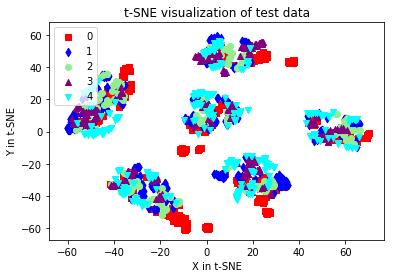

In [118]:
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
mlt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    mlt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
mlt.xlabel('X in t-SNE')
mlt.ylabel('Y in t-SNE')
mlt.legend(loc='upper left')
mlt.title('t-SNE visualization of test data')
mlt.show()